In [5]:
import numpy as np
import matplotlib.pyplot as plt

import sys

sys.path.append("./python/src")

from simulation_overhead import *

In [6]:
dt = 0.1

In [7]:
inter_dist = [100, 100, 100, 0, 0]
inhib_dist = [0, 0, 0, 50, 40]
type_dist = ["p23", "p23", "p23", "nb", "b"]
neuron_class = "IZ"

n_neurons = sum(inter_dist) + sum(inhib_dist)
max_synapses = 100
noise_sigma = 100

thr_mult = np.ones((n_neurons, 1)) * 1.25
thr_decay = np.ones((n_neurons, 1)) * np.exp(-dt / 50)

params, inhib_mask = neuron_params_classic(type_dist, inter_dist, inhib_dist, threshold_mult=thr_mult, threshold_decay=thr_decay)

sim = NeuralSimulator(n_neurons, max_synapses, params, inhib_mask, noise_sigma, dt, weight_mult=1)

In [8]:
T = 1000
n_steps = int(T / dt)

t_p = int(50/dt)

I = np.zeros((n_steps, n_neurons))
# I[t_p*10:t_p*10 + t_p, 0] = 1000
I[:, :50] = 1000

sim.simulate(T, I)

[]

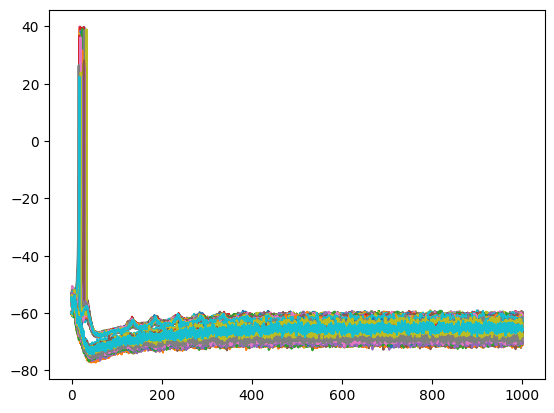

In [10]:
plt.plot(sim.ts, np.array(sim.stats.V_hist)[:,100:])
plt.plot()